# Etivity 3: Clustering and Manifold Learning

### A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df = pd.read_csv("loans_train_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 17)


### B. Rescale the Data
Here we rescale the values in each column to the interval $[0,1]$ with MinMaxScaler.

In [3]:
dataprescaler= data

In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

### C. Scatterplot Function (to be used below for visualising a clustering)

In [5]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

Number of clusters $k$.

In [7]:
k=3
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [8]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

### Calculate optimum *k* using Elbow method

In [9]:
# Without Scaling
wcss = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(dataprescaler)
    wcss.append(kmeanModel.inertia_)

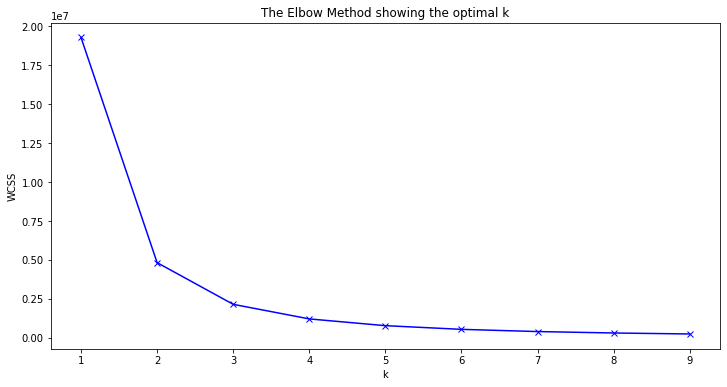

In [10]:
plt.figure(figsize=(12,6))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [11]:
# Data After Scaling
wcss = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(data)
    wcss.append(kmeanModel.inertia_)

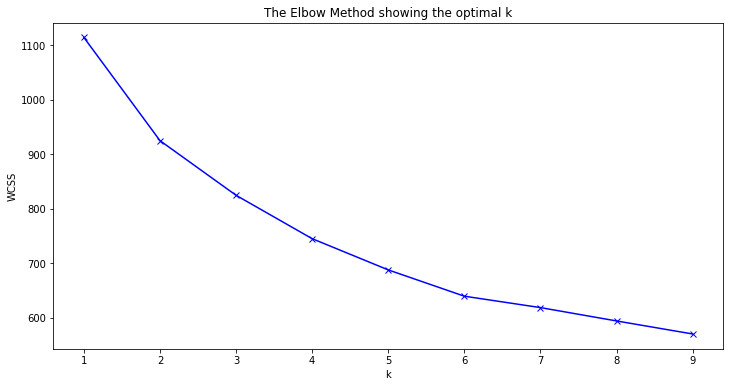

In [12]:
plt.figure(figsize=(12,6))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Calculate optimum *k* using Silhouette method

In [13]:
for n_cluster in range(2, 11):
    kmeans = cluster.KMeans(n_clusters=n_cluster).fit(data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(data, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.1753123272012606
For n_clusters=3, The Silhouette Coefficient is 0.17735493881872919
For n_clusters=4, The Silhouette Coefficient is 0.17817749799252966
For n_clusters=5, The Silhouette Coefficient is 0.17333921988836223
For n_clusters=6, The Silhouette Coefficient is 0.19108967301455246
For n_clusters=7, The Silhouette Coefficient is 0.1910206461805087
For n_clusters=8, The Silhouette Coefficient is 0.19110142069269775
For n_clusters=9, The Silhouette Coefficient is 0.20062077950374124
For n_clusters=10, The Silhouette Coefficient is 0.1891327439621774


### E. Apply a manifold-learning technique to project the data set to a 2D space